<a href="https://colab.research.google.com/github/erodola/NumMeth-s2-2022/blob/main/esercizi/ex3/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benvenuti alla terza esercitazione di Metodi Numerici!

Oggi vedremo il concetto di regolarizzazione (*sparsità* e *regolarità* (smoothness)) in modo pratico verificando l'effetto su segniali definiti su diversi domini. Importiamo i requirements, definiamo alcune funzioni di supporto e scarichiamo i dati necessari:

In [ ]:
import librosa
import numpy as np
import IPython
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy
from PIL import Image
from tqdm import tqdm

In [ ]:
def plot(x, y, title=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    ax.set_xlabel('t')
    ax.set_title(title)
    ax.plot(x, y, '-')
    plt.show()

In [ ]:
!wget https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/drums.wav
!wget https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/mountain.png

--2022-03-23 10:35:58--  https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/drums.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex3/drums.wav [following]
--2022-03-23 10:35:58--  https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex3/drums.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21305422 (20M) [application/octet-stream]
Saving to: ‘drums.wav.1’

drums.wav.1         100%[===================>]  20.32M   112MB/s    in 0.2s    

2022-03-23 10:36:00 (112 MB/s) - ‘drums.wav.1’ saved [21305422/21305422]

--2022-0

## 1. Regolarizzazione di Tikhonov

Riprendiamo il fitting di polinomi usando il metodo dei minimi quadrati. Supponiamo di trovarci nel caso in cui il numero di punti a disposizione è inferiore a quello del grado del polinomio. Per esempio se abbiamo $n=4$, il sistema è sotto-determinato nel caso in cui il numero di coppie di punti a nostra disposizione è inferiore a 5. 

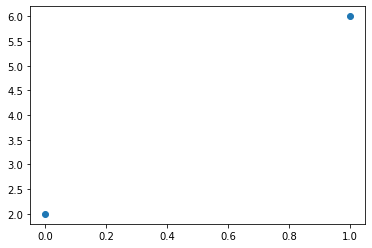

In [ ]:
n = 4

x2 = np.array([0, 1.])[:, np.newaxis]
y2 = np.array([2., 6.])[:, np.newaxis]

plt.scatter(x2, y2)

Proviamo a trovare una soluzione $\theta$ usando il regolarizzatore di Tikhonov
$ \mathbf{\theta} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$. Per questo esempio scegliamo $\alpha = 1$.

In [ ]:
X2 = np.concatenate((x2**4, x2**3, x2**2, x2**1, x2**0),1)
print(f"X2 = {X2}")

alpha = 1.
theta2 = np.linalg.inv(X2.T @ X2 + alpha * np.eye(5)) @ X2.T @ y2
print(f"theta = {theta2}")

X2 = [[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
theta = [[0.90909091]
 [0.90909091]
 [0.90909091]
 [0.90909091]
 [1.45454545]]


In [ ]:
x2_new = np.linspace(-2, 2, 20)[:, np.newaxis]
X2_new = np.concatenate((x2_new**4, x2_new**3, x2_new**2, x2_new**1, x2_new**0),1)
y2_new = X2_new@theta2  
print(f"y2_new = {y2_new}")

y2_new = [[10.54545455]
 [ 6.85149885]
 [ 4.35737769]
 [ 2.77111273]
 [ 1.84358483]
 [ 1.36853406]
 [ 1.18255971]
 [ 1.16512025]
 [ 1.23853338]
 [ 1.367976  ]
 [ 1.5614842 ]
 [ 1.86995328]
 [ 2.38713777]
 [ 3.24965139]
 [ 4.63696704]
 [ 6.77141687]
 [ 9.91819221]
 [14.3853436 ]
 [20.52378079]
 [28.72727273]]


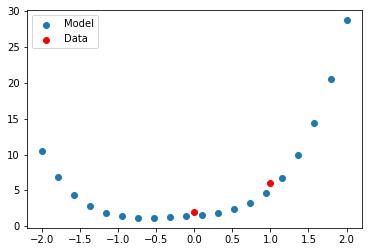

In [ ]:
plt.scatter(x2_new, y2_new)
plt.scatter(x2, y2, color='r')
plt.legend(['Model', 'Data'])

**Esercizio 1 - Alpha sweep**

 1. Rifare l'esempio aggiungendo un data point. Confrontare la soluzione
 per lo stesso valore di $\alpha = 1$
 2. Provare a variare il valore di $\alpha$ usando i valori [0.1, 0.5, 10., 100.]. Plottare le diverse curve fittate. Come cambiano le componenti di $\theta$ all'aumentare di $\alpha$ (calcolare la norma delle diverse $\alpha$)? 
 3. BONUS: Cosa succede quando $\alpha \to 0$? Come si può interpretare in modo matematico questo fenomeno?

theta = [[-1.47310272]
 [-0.6286992 ]
 [ 1.06010785]
 [ 4.43772195]
 [ 2.83572274]]
norm(theta) = 5.605695546204316
theta = [[0.01555664]
 [0.31178091]
 [0.90422946]
 [2.08912656]
 [2.81964025]]
norm(theta) = 3.6372931143792906
theta = [[0.35905655]
 [0.39082503]
 [0.454362  ]
 [0.58143594]
 [0.94143983]]
norm(theta) = 1.3086204014000584
theta = [[0.05973582]
 [0.06366674]
 [0.07152859]
 [0.08725227]
 [0.13732637]]
norm(theta) = 0.19801427427282725


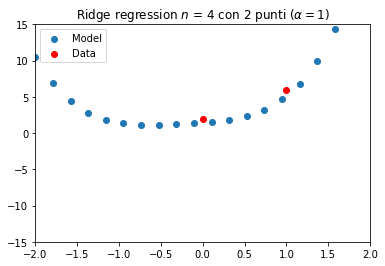

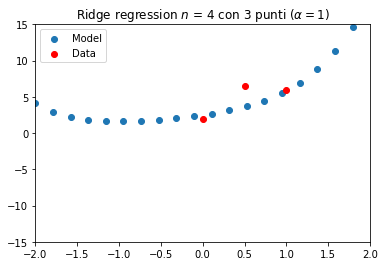

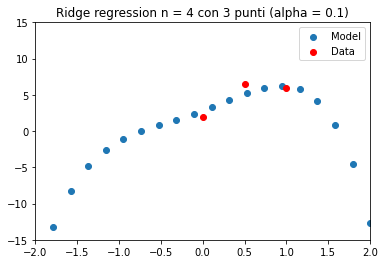

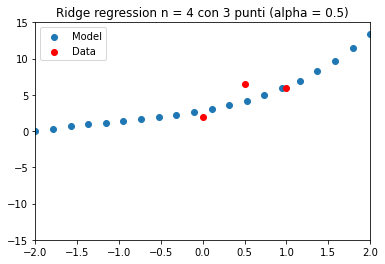

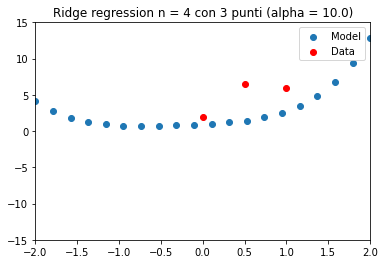

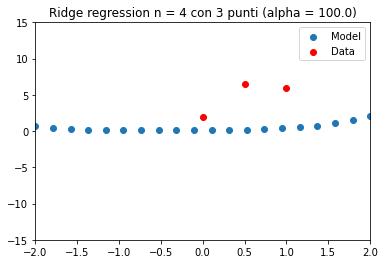

In [ ]:
n = 4
alpha = 1.

# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################

# Aggiungiamo un punto a x

x3 = ... 
y3 = ... 


# Creiamo la matrice dei dati X3
X3 = ... 

# Applichiamo la formula della ridge regression
theta3 = ... 

# Valutiamo il nuovo modello in alcuni punti
x3_new = ...
X3_new = ...
y3_new = ... 

# Plottiamo il nuovo modello (e confrontiamo con il modello fittato con 2 punti)
# plt.scatter(x2_new, y2_new)
# plt.scatter(x2, y2, color='r')
# plt.legend(['Model', 'Data'])
# plt.xlim(-2, 2)
# plt.ylim(-15, 15)
# plt.title('Ridge regression n = 4 con 2 punti (alpha = 1)')

# plt.figure()
# plt.scatter(x3_new, y3_new)
# plt.scatter(x3, y3, color='r')
# plt.legend(['Model', 'Data'])
# plt.xlim(-2, 2)
# plt.ylim(-15, 15)
# plt.title('Ridge regression n = 4 con 3 punti (alpha = 1)')

# Effettuiamo la regressione regolarizzata per diversi valori di alpha
for alpha_i in [0.1, 0.5, 10., 100.]:
  theta = ... 
  # Stampiamo i valori di theta e la relativa norma
  print(...)
  print(...)
  
  # valutiamo il modello nei nuovi punti
  y_new = ... 
    
  # plt.figure()
  # plt.scatter(x3_new, y_new)
  # plt.scatter(x3, y3, color='r')
  # plt.legend(['Model', 'Data'])
  # plt.xlim(-2, 2)
  # plt.ylim(-15, 15)
  # plt.title(f"Ridge regression n = 4 con 3 punti (alpha = {alpha_i})")

## 2. Regolarizzazione per problemi 1D

### 2.1 Deblurring

Passiamo ad esaminare segnali uni-dimensionali. A tal fine carichiamo la traccia di batteria che abbiamo gia incontrato nella prima lezione e selezioniamo un chunk di 300 sample.

In [ ]:
sr = 44100
# carichiamo 300 samples a partire da 0:10
t = 10
n = 300
drums, _ = librosa.load('drums.wav', sr=sr)
drums_chunk = drums[t * sr: t * sr + n][:, np.newaxis]

Visualizziamo il segnale:

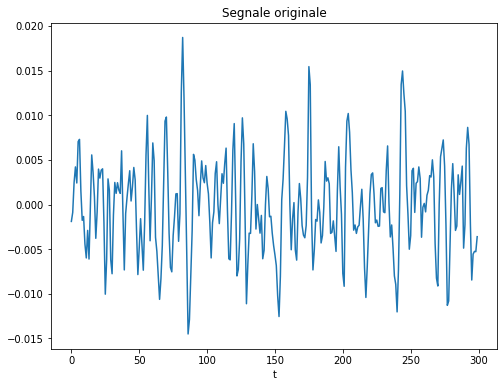

In [ ]:
y_plot = drums_chunk
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale originale")

# IPython.display.Audio(drums, rate=sr)

Possiamo sfocare la traccia applicando un *kernel Gaussiano* locale $K \in \mathbb{R}^{n\times n}$, tale che $K_{i, j} = g_{a,c}(j - i)$, dove $$g_{a,c}(j - i) = a \exp{-\frac{(j - i)^2}{2c^2}}.$$ È facile verificare che ogni diagonale di questa matrice contiene termini costanti. Una matrice che soddisfa questa proprietà è detta *matrice di Toeplitz*.

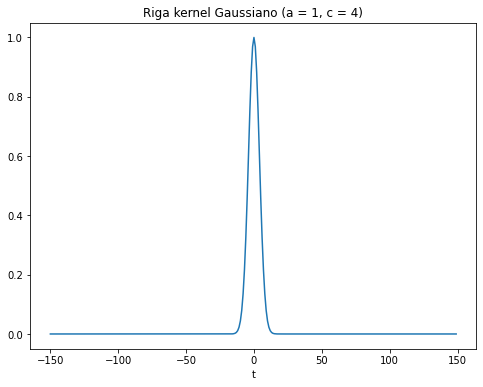

In [ ]:
kernel_interval = np.arange(-n//2, n//2)

a = 1.
c = 4.
kernel_row = a*np.exp(-kernel_interval**2/(2*c**2))

y_plot = kernel_row
x_plot = kernel_interval
plot(x_plot, y_plot, title="Riga kernel Gaussiano (a = 1, c = 4)")

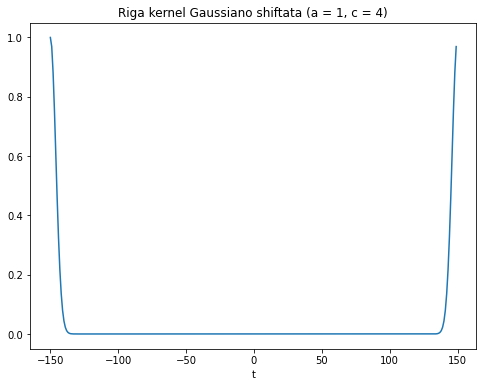

In [ ]:
kernel_row_shifted = np.roll(kernel_row, shift=-n//2)
y_plot = kernel_row_shifted
x_plot = kernel_interval
plot(x_plot, y_plot, title="Riga kernel Gaussiano shiftata (a = 1, c = 4)")

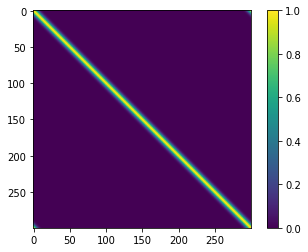

In [ ]:
K = scipy.linalg.toeplitz(kernel_row_shifted)
plt.imshow(K)
plt.colorbar()

In [ ]:
pippo = np.array([1., 2. ,3., 4.])
T_pippo = scipy.linalg.toeplitz(pippo)

Possiamo sfocare il segnale semplicemente applicando la matrice $G$:

In [ ]:
drums_chunk_blur_c1 = K @ drums_chunk

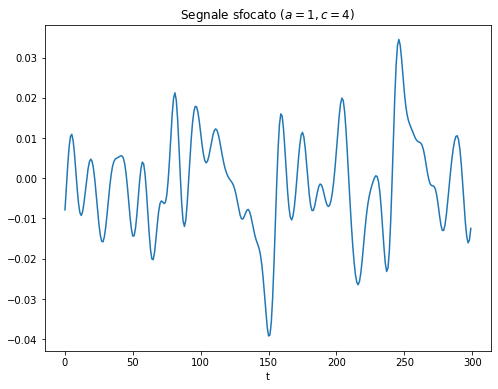

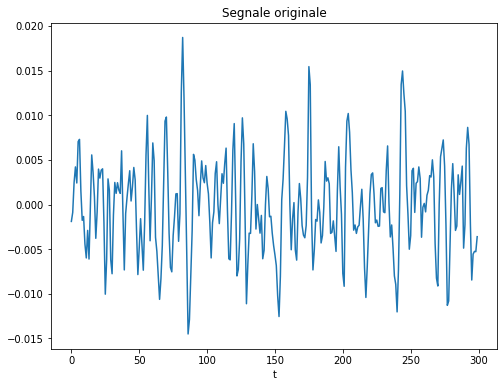

In [ ]:
y_plot = drums_chunk_blur_c1
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=1, c=4$)")


y_plot = drums_chunk
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale originale")
# IPython.display.Audio(drumsdrums_chunk_blur_blur, rate=sr)

Osserviamo che il segnale è diventato più *smooth*. Vediamo cosa succede se aumentiamo il parametro $c$:

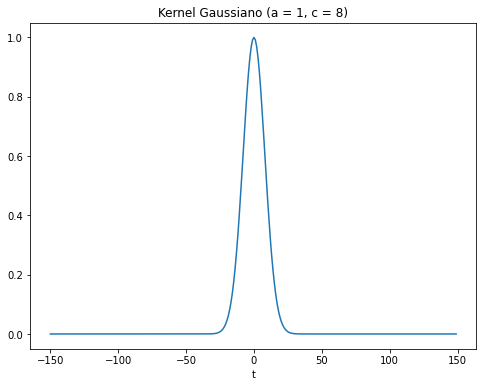

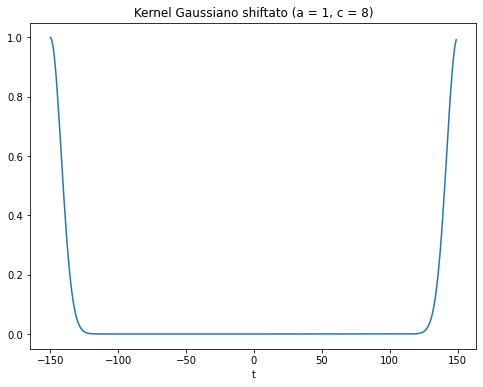

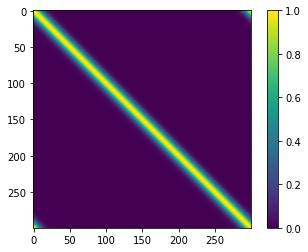

In [ ]:
a = 1.
c = 8.                                                            
kernel_row = a*np.exp(-kernel_interval**2/(2*c**2))
                                                                   
y_plot = kernel_row                                                
x_plot = kernel_interval                                           
plot(x_plot, y_plot, title="Kernel Gaussiano (a = 1, c = 8)")    

kernel_row_shifted = np.roll(kernel_row, shift=-n//2)
y_plot = kernel_row_shifted
x_plot = kernel_interval
plot(x_plot, y_plot, title="Kernel Gaussiano shiftato (a = 1, c = 8)")

K = scipy.linalg.toeplitz(kernel_row_shifted)
plt.imshow(K)
plt.colorbar()

In [ ]:
drums_chunk_blur_c2 = K@drums_chunk

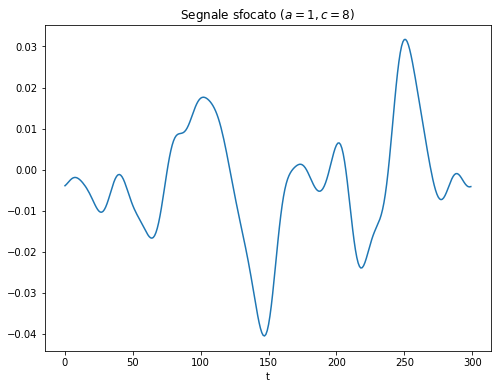

In [ ]:
y_plot = drums_chunk_blur_c2
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=1, c=8$)")

Ci poniamo il seguente problema inverso: conoscendo la traccia sfocata $x_{\text{blurry}}$ e l'operatore di blurring $G = K$, possiamo risalire alla traccia originale $x$? Il problema è sotto-determinato essendoci infinite $x$ tali che $G x = x_{\text{blurry}}$. A tal fine risolviamo il problema usando un regolarizzatore di Tikhonov, provando diversi valori di $\alpha$

In [ ]:
x_blurry = drums_chunk_blur_c2

alpha = 0.01

x_1 = np.linalg.inv(K.T@K + alpha*np.eye(K.shape[1]))@K.T@x_blurry

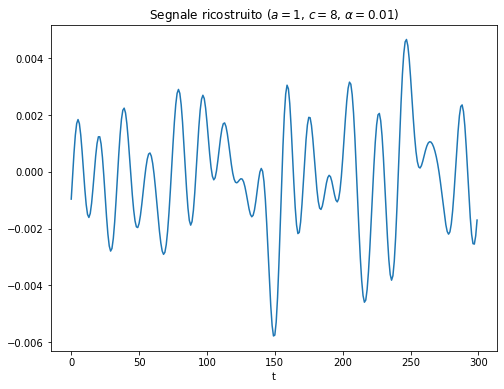

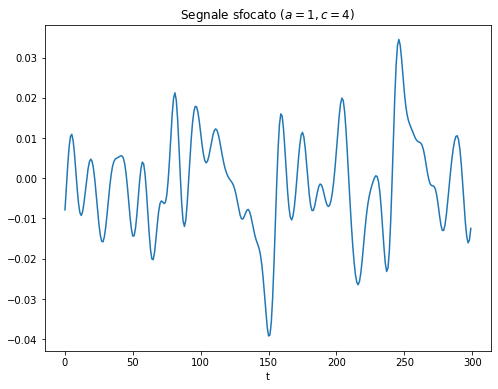

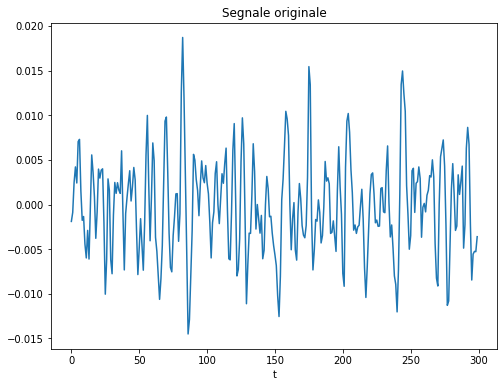

In [ ]:
y_plot = x_1
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale ricostruito ($a=1$, $c=8$, $\\alpha = 0.01$)")

y_plot = drums_chunk_blur_c1
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=1, c=4$)")

y_plot = drums_chunk
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale originale")

# IPython.display.Audio(x_1, rate=sr)

Non siamo riusciti a ricostruire fedelmente i dettagli, ma confrontando la soluzione con il segnale affetto da blur con $c=4$, notiamo che ci siamo avvicinati al segnale originale. Per avere una ricostruzione fedele si possono introdurre tecniche di learning (che esulano dallo scope di questa lezione).

L'esempio precedente non può essere ascoltato. Questo perchè codifichiamo solamente 300/44100 = 0.006s di traccia, una quantità impercettibile all'udito. 

Ripetiamo l'esempio con 2 secondi di traccia ($n$ = 88200)

In [ ]:
# carichiamo 88200 samples a partire da 0:10
n = 88200
drums_long = drums[t * sr: t * sr + n][:, np.newaxis]

IPython.display.Audio(drums_long[:, 0], rate=sr)

Se proviamo a creare la matrice 𝐾 come prima ci imbattiamo in problemi di memoria (se provate a farlo il kernel Jupyter viene restartato avendo saturato la memoria). 

Nei casi in cui la maggior parte delle entrate di una matrice sono zeri, conviene usare matrici sparse. Le matrici sparse memorizzano solamente le entrate diverse da zero, e quindi è possibile rappresentare dati alto-dimensionali senza imbatersi in problemi di memoria. Dato che il kernel Gaussiano tende esponenzialmente a zero allontanandosi dalla media, le matrici di blurring in effetti possono essere rappresentate come matrici sparse.

In [ ]:
nonzero_entries = 40
kernel_interval = np.arange(-nonzero_entries//2, nonzero_entries//2, dtype=np.int64) #entries, dtype=np.int64) - (entries//2)

a = 1.
c = 8.
kernel_row = a*np.exp(-kernel_interval**2/(2*c**2))
K = sparse.diags(kernel_row, kernel_interval, shape=(n, n)) 

print(f"K = {repr(K)}")

K = <100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 3600 stored elements (40 diagonals) in DIAgonal format>


Se usassimo una matrice densa, $K$ peserebbe 88200 $\times$ 88200 $\times$ 8 bytes = 62 Gb 🤡. Dato che usiamo solo 3527600 elementi, quest'ultima pesa solamente 3 Mb, ~1764 volte di meno!

Smoothiamo il segnale con $K$:

In [ ]:
drums_long_blur = K @ drums_long

IPython.display.Audio(drums_long_blur[:, 0], rate=sr)

Per effettuare i minimi quadrati con matrici sparse, non possiamo procedere come nel caso denso. Esistono metodi iterativi (metodi che vedremo più approfonditamente nelle prossime lezioni) per minimi quadrati su matrici sparse. Usiamo il metodo *LSMR* (https://arxiv.org/abs/1006.0758) implementato in `scipy`. Il valore $\alpha$ della regolarizzazione di Tikhonov può essere impostato nel parametro `damp`:

In [ ]:
x = scipy.sparse.linalg.lsmr(K, drums_long_blur, damp=0.01)[0]
IPython.display.Audio(x, rate=sr)

### 2.2 Denoising

Possiamo affrontare il problema ortogonale al deblurring, ossia il denoising. Supponiamo che il nostro segnale $\mathbf{x}$ sia stato corrotto con del rumore Gaussiano $\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \sigma^2\mathbf{I})$ ($\sigma$ ha un ruolo simile alla $c$ vista nell'esempio di deblurring, in effetti se la funzione Gaussiana dell'esempio precedente e' tale che il suo integrale su tutto $\mathbb{R}$ è 1 allora  $\sigma = c$; da notare che in questo caso abbiamo una Gaussiana multivariabile): $$\mathbf{x}_{\text{noisy}} = \mathbf{x} + \mathbf{z}.$$ Il nostro task adesso è quello di ottenere una soluzione più smooth, rimuovendo il rumore. A tal fine vogliamo risolvere il seguente problema di minimizzazione:
$$ \mathbf{x}_{\text{smooth}} = \operatorname*{arg\,min}_\mathbf{x} \Vert \mathbf{x} - \mathbf{x}_{\text{noisy}}\Vert^2_2 + \alpha \Vert D \mathbf{x}\Vert^2_2 $$ dove $D$ è la derivata discreta: $$ D = \begin{bmatrix} 1 & -1 & \dots & 0 \\ 0 & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & 1 \end{bmatrix}.$$ Anche in questo caso la matrice $D$ è di Toepliz.


## Esercizio 2
1. Scrivere l'equazione normale per il problema di minimizzazione definito sopra.
2. Perturbare `drums_chunk` con rumore Gaussiano bianco per ottenere `x_noisy`. Clippare nell'intervallo -1 e 1.
3. Risolvere il problema dei minimi quadrati regolarizzato per trovare la soluzione e plottare la soluzione.
4. Perturbare tutto `drums_long`, ottenendo `drums_long_noisy` poi ascoltare la versione noisy. 
5. Risolvere il problema su `drums_long` applicando iterativamente il metodo su chunk locali. Ascoltare il risultato.


In [ ]:
n = 100
sigma_square = 10.
alpha = 5.
drums_small_chunk = drums_long[:n]

# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################

# Perturbiamo drums_chunk con rumore Gaussiano
# Campioniamo una z (usare np.random.randn e moltiplicare per sigma_square)
z = ...
x_noisy = ...

# plt.figure()
# y_plot = x_noisy
# x_plot = np.arange(y_plot.shape[0])
# plot(x_plot, y_plot, title="Segnale noisy ($\\sigma^2 = 10$)")

# plt.figure()
# y_plot = drums_small_chunk
# x_plot = np.arange(y_plot.shape[0])
# plot(x_plot, y_plot, title="Segnale originale")

# Scriviamo l'operatore D (conviene usare sparse.diags, poi passare alla matrice densa)
D = ...

# Risolviamo per la x
x = ... 

# Plottiamo la soluzione x:
# plt.figure()
# y_plot = x
# x_plot = np.arange(y_plot.shape[0])
# plot(x_plot, y_plot, title="Segnale ricostruito ($\\alpha = 5, \\sigma^2 = 10$)")

# Risolviamo su tutto drums
z = ...
drums_long_noisy = ...

# IPython.display.Audio(drums_long[:, 0], rate=sr)
# IPython.display.Audio(drums_long_noisy[:, 0], rate=sr)

x_long = np.zeros((88200,1))

for i in range(88200 // n):
  x_noisy_local = ... 
  x_local = ...
  # x_long[i*n:(i+1)*n] = ... 

# IPython.display.Audio(x_long[:, 0], rate=sr)

## 3. Regolarizzazione per problemi 2D

Passiamo a problemi di regolarizzazione nel setting 2D. A tal proposito, ripetiamo l'esercizio precedente nel setting 2D.

## Esercizio 3
1. Caricare l'immagine `mountain.jpg` usando PIL
2. Perturbare l'immagine con rumore Gaussiano bianco per ottenere `x_noisy`
3. Risolvere il problema di denoising applicando iterativamente il metodo dei minimi quadrati su chunk locali (si puo' usare una sola direzione di denoising per semplicità). Visualizzare il risultato.
4. Fare il denoising su entrambe le direzioni.

In [ ]:
sigma_square = 0.8
alpha = 1.
n = 256 
chunk_size = 32

# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################

# carichiamo l'imagine con PIL
image = ...
# trasformiamo in un vettore np dopo aver normalizzato
pix = ... 

# plottiamo l'immagine
# plt.imshow(pix)

# creare rumore e aggiungere al dato
z = ... 
x_noisy =  ...
# x_noisy = np.clip(x_noisy, 0., 1.)

# plottiamo l'immagine noisy
# plt.imshow(x_noisy)

# la soluzione
x = ... 
# kernel di derivazione su chunk
D = ... 

# iteriamo sui diversi chunk e applichiamo il denoising su ognuno di loro
for i_chunk in range(n // chunk_size):
  for j_chunk in tqdm(range(n // chunk_size)):
    # indicizziamo il chunk noisy
    patch_noisy = ...
    # trasformiamo il chunk in un vettore
    patch_noisy_vec = ...  
    # iteriamo sui 3 canali
    for c in range(3):
      # applichiamo le equazioni normali con la loss L2 sulla derivata
      # (ricordarsi di effettuare il clipping per evitare valori oltre il boundary [0., 1.])
      patch_rec_tmp = ... 
      # riempire il valore di x con le generazioni locali
      # x[i_chunk*chunk_size:(i_chunk+1)*chunk_size,
      #  j_chunk*chunk_size:(j_chunk+1)*chunk_size, c] = ... # patch_rec_tmp.reshape(chunk_size, chunk_size)

# plottiamo il risultato
# plt.imshow(x)

100%|██████████| 8/8 [00:00<00:00, 75743.64it/s]
